In [42]:
import datetime, time
import pytz

tz = pytz.timezone('US/Central')
print(tz)

# unix time to '2017-11-01 15:52:00'
def unixtime_to_datetime_pre(timestamp):
    timestamp = timestamp/1000
    dt = datetime.datetime.fromtimestamp(timestamp, tz).strftime('%m-%d-%Y %H:%M:%S')
    return dt
    
def unixtime_to_datetime(timestamp):
    timestamp = timestamp/1000
    dt = datetime.datetime.fromtimestamp(timestamp, tz).strftime('%m/%d %H:%M:%S')
    return dt
   

#unix time to  '2017-11-01 15:52:00' -> '2017-11-01'
def unixtime_to_date(timestamp):
    dt = unixtime_to_datetime(timestamp)
    return dt.split(' ')[0]

#unix time to  '2017-11-01 15:52:00' -> '15:52:00'
def unixtime_to_time(timestamp):
    dt = unixtime_to_datetime(timestamp)
    return dt.split(' ')[1]

#unix time to '15*52' in minutes
def unixtime_to_timeOfDay(timestamp):    
    tm = unixtime_to_time(timestamp)
    toks = tm.split(':')
    h = int(toks[0])
    m = int(toks[1])
    timeOfday = h*60 + m    
    return timeOfday

ut = 1512506705814 # 1386181800

print(unixtime_to_datetime(ut))
print(unixtime_to_date(ut))
print(unixtime_to_time(ut))
print(unixtime_to_timeOfDay(ut))


US/Central
12/05 14:45:05
12/05
14:45:05
885


69009c83-efcb-31f8-be0a-b70afb5a79f3
4c5f9446-48b2-3139-b895-922ffbcec083
4cc2f061-262a-38f1-a129-dc35f3627732


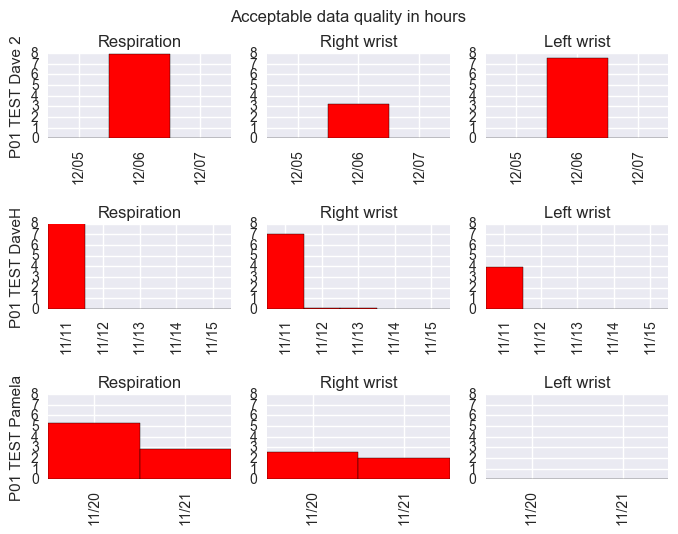

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from pathlib import Path
import os.path


from scipy import stats
import seaborn as sns

SENSOR_UNAVAILABLE = 4
DATA_LOST = 6
SENSOR_OFF_BODY = 8
SENSOR_ON_BODY = 9
IMPROPER_ATTACHMENT = 10
DELAY_IN_ATTACHMENT = 12
SENSOR_BATTERY_DOWN = 14
PHONE_BATTERY_DOWN_LABEL = 16
SENSOR_POWERED_OFF = 18
PHONE_POWERED_OFF_LABEL = 20
ACCEPTABLE_DATA = 22

rip_dataquality_filename = 'rip_diagnostic.txt'
rightwrist_dataquality_filename = 'motionsense_right_diagnostic.txt'
leftwrist_dataquality_filename = 'motionsense_left_diagnostic.txt'

def getAndUpdateData(cur_dir, filename):
    D = None
    my_file = Path(cur_dir + filename)
    if my_file.is_file():
    
        col_name = ['start_datetime', 'end_datetime', 'label']
        D = pd.read_csv(cur_dir + filename, names = col_name)

        D['date'] = [unixtime_to_date(sdt) for sdt in D['start_datetime']]
        D['time_of_day'] = [unixtime_to_timeOfDay(sdt) for sdt in D['start_datetime']]
#         D['end_date'] = [tu.unixtime_to_date(sdt) for sdt in D['end_datetime']]
#         D['end_time_of_day'] = [tu.unixtime_to_timeOfDay(sdt) for sdt in D['end_datetime']]
    return D

def plotGoodDQ(DQ, r, c, i, sensor):
    dates = DQ['date'].unique()

    onBody = [0]*len(dates)
    indx = 0
    for dt in dates:
        D = DQ[DQ['date'] == dt]
        D = D[D['label'] == SENSOR_ON_BODY]
        onBody[indx] = len(D)/60.0
        indx = indx +1
    
    fig.add_subplot(r, c, i)  

    ind=np.arange(len(dates))    
    plt.bar(ind, onBody, width=1.0, color='r')
    plt.xticks(ind+0.5, dates, rotation='vertical')
    plt.title(sensor)
    plt.ylim(0, 8)


basedir = 'C:\\Users\\sakther\\Documents\\python_workshop\\md2k_mCerebralCortex\\dataquality\\'

pids = ['69009c83-efcb-31f8-be0a-b70afb5a79f3', '4c5f9446-48b2-3139-b895-922ffbcec083', '4cc2f061-262a-38f1-a129-dc35f3627732']
uids = ['P01 TEST Dave 2', 'P01 TEST DaveH', 'P01 TEST Pamela']

fig = plt.figure()
plt.suptitle('Acceptable data quality in hours')
fig.subplots_adjust(hspace=1.0)

nRow = len(pids)
nCol = 3

for i in range(len(pids)):
    pid = pids[i]
    print(pid)

    ripDQ = getAndUpdateData(basedir, pid+rip_dataquality_filename)
    rwDQ = getAndUpdateData(basedir, pid+rightwrist_dataquality_filename)
    lwDQ = getAndUpdateData(basedir, pid+leftwrist_dataquality_filename)
    
    plotGoodDQ(ripDQ, nRow, nCol, i*3+1, 'Respiration')
    plt.ylabel(uids[i])
    plotGoodDQ(rwDQ, nRow, nCol, i*3+2, 'Right wrist')
    plotGoodDQ(lwDQ, nRow, nCol, i*3+3, 'Left wrist')
    
plt.show()

    